In [1]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt

file_name = "gps_mote_long_gologic_output-3.0.csv"
df = pd.read_csv("Data/" + file_name)
df.drop(['accumulated_us'], axis=1, inplace=True)
df.columns

Index(['delay_us'], dtype='object')

Number of removed elements: delay_us    0
dtype: int64


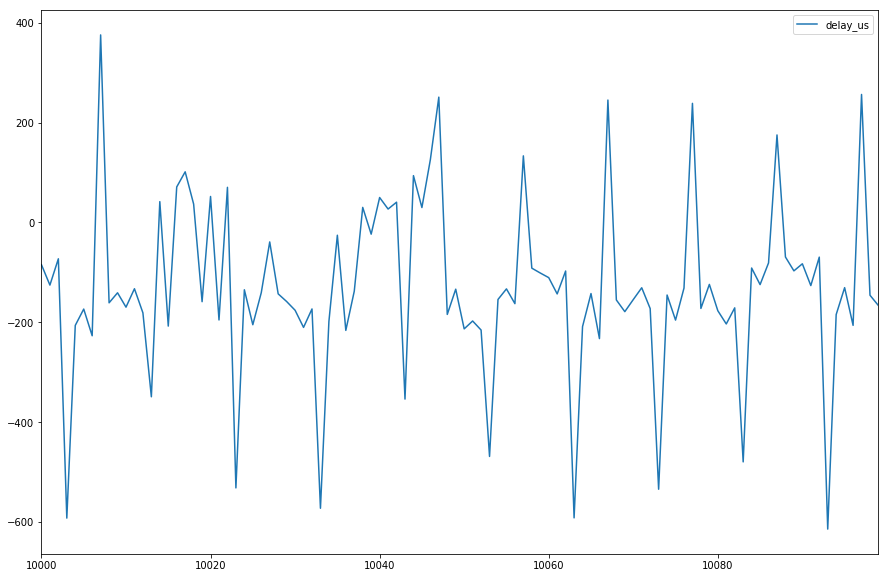

In [16]:
%matplotlib inline
plt.figure()

# remove some outliers
removed_elements_count = df.count()
df = df[df < df.mean() + 3*df.std()]
df = df[df > df.mean() - 3*df.std()]
removed_elements_count = removed_elements_count - df.count()
df.iloc[10000:10100].plot(figsize=(15,10))
print("Number of removed elements: {}".format(removed_elements_count))

Text(0.5,1,'gps_mote_long_gologic_output-3.0.csv')

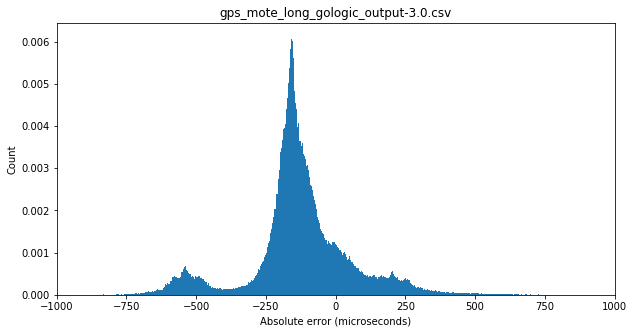

In [8]:
# df.delay_us = df.delay_us[df.delay_us < df.delay_us.mean() + 10*df.delay_us.std()]
# plt.figure()
# plot = zoom_in.hist(cumulative=True, bins=250, figsize=(20,5))
# plot.set_xlim(0,500)

bin_limit = 1000
step = 2.5
bins = list(np.arange(-bin_limit,bin_limit,step))

if df.delay_us.min() < -bin_limit:
    bins = [df.delay_us.min()] + bins
    
if df.delay_us.max() > bin_limit:
    bins = bins + [df.delay_us.max()]


plt.figure()
plot = df.delay_us.plot(kind="hist", cumulative=False, bins=bins, figsize=(10,5), density=True)
plot.set_xlim(-bin_limit, bin_limit)
plot.set_xlabel("Absolute error (microseconds)")
plot.set_ylabel("Count")
plot.set_title(file_name)

Text(0.5,1,'GPS only')

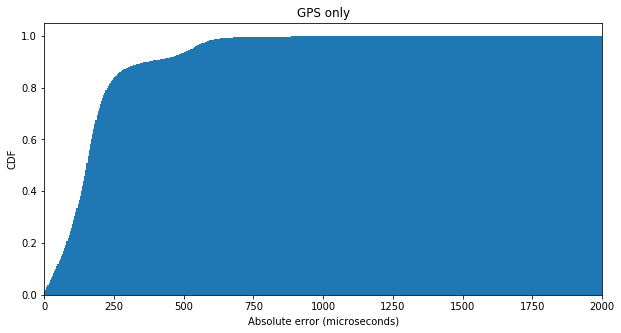

In [6]:
abs_delay = abs(df.delay_us)

bin_limit = 2000
step = 4
bins = list(np.arange(0,bin_limit,step))
    
if abs_delay.max() > bin_limit:
    bins = bins + [abs_delay.max()]


plt.figure()
plot = abs_delay.plot(kind="hist", cumulative=True, normed=1, bins=bins, figsize=(10,5))
plot.set_xlim(0,bin_limit)
plot.set_xlabel("Absolute error (microseconds)")
plot.set_ylabel("CDF")
plot.set_title("GPS only")




In [7]:
df.count()

delay_us    457477
dtype: int64